# Dashboard of Lego sets

## Background

Based on the following compettion from Datacamp: https://app.datacamp.com/workspace/w/01b3d6d5-8494-4c07-937f-0d1833ab1837?utm_source=customerio&utm_medium=email&utm_campaign=230323_1-workspace-nl-b_2-mix_3-all_4-na_5-nl_6-workspacenl_7-ws_8-emal-ci_9-na_10-bau_11-email&utm_content=blast

## The Data

https://app.datacamp.com/workspace/external-link?url=https%3A%2F%2Frebrickable.com%2Fdownloads

💾 The data
Database Description
inventory_parts

"inventory_id" - id of the inventory the part is in (as in the inventories table)
"part_num" - unique id for the part (as in the parts table)
"color_id" - id of the color
"quantity" - the number of copies of the part included in the set
"is_spare" - whether or not it is a spare part
parts

"part_num" - unique id for the part (as in the inventory_parts table)
"name" - name of the part
"part_cat_id" - part category id (as in part_catagories table)
part_categories

"id" - part category id (as in parts table)
"name" - name of the category the part belongs to
colors

"id" - id of the color (as in inventory_parts table)
"name" - color name
"rgb" - rgb code of the color
"is_trans" - whether or not the part is transparent/translucent
inventories

"id" - id of the inventory the part is in (as in the inventory_sets and inventory_parts tables)
"version" - version number
"set_num" - set number (as in sets table)
inventory_sets

"inventory_id" - id of the inventory the part is in (as in the inventories table)
"set_num" - set number (as in sets table)
"quantity" - the quantity of sets included
sets

"set_num" - unique set id (as in inventory_sets and inventories tables)
"name" - the name of the set
"year" - the year the set was published
"theme_id" - the id of the theme the set belongs to (as in themes table)
num-parts - the number of parts in the set
themes

"id" - the id of the theme (as in the sets table)
"name" - the name of the theme
"parent_id" - the id of the larger theme, if there is one
Acknowledgments
The data was provided by Rebrickable.com and be accessed through LEGO Catalog Database Downloads

### Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data

In [2]:
df = pd.read_csv('sets.csv')

### Basic data info

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20899 entries, 0 to 20898
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    20899 non-null  object
 1   name       20899 non-null  object
 2   year       20899 non-null  int64 
 3   theme_id   20899 non-null  int64 
 4   num_parts  20899 non-null  int64 
 5   img_url    20899 non-null  object
dtypes: int64(3), object(3)
memory usage: 979.8+ KB
None
  set_num                        name  year  theme_id  num_parts  \
0   001-1                       Gears  1965         1         43   
1  0011-2           Town Mini-Figures  1979        67         12   
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0   
3  0012-1          Space Mini-Figures  1979       143         12   
4  0013-1          Space Mini-Figures  1979       143         12   

                                             img_url  
0   https://cdn.rebrickable.com/media/sets/001-1.jpg  
1  h

### Analysis

1. What is the average number of Lego sets released per year over the total time span of our data?

In [18]:
# To calculate the average number of Lego sets released per year, we'll follow these steps :
# determine the total amount of sets (aliased here as total_sets),
sets = df.set_num.unique()
total_sets = len(sets)
# determine the total amount of years (aliased here as total_years),
years = df.year.unique()
total_years = len(years)
# calcute the average by dividing the total amount of sets by the total amount of years.
avg = total_sets/total_years

print('Total years: ' + str(total_years) + ' Total sets: '+ str(total_sets) + ' Average sets per year: ' + str(avg))

Total years: 73 Total sets: 20899 Average sets per year: 286.28767123287673


2. What is the average number of Lego parts over total time span and per year?

2.1 What is the average number of Lego parts per year over the total time span of our data?

In [23]:
# We can calculate the average number of Lego parts as follows :
# determine the total amount of parts (aliased here as total_parts),
total_parts = df.num_parts.sum()
# determine the total amount of years (aliased here as total_years),
years = df.year.unique()
total_years = len(years)
# calculate the average by dividing the total amount of parts by the total amount of years.
parts_avg = total_parts/total_years

print('Total amount of parts: ' + str(total_parts) + ' Total years: ' + str(total_years) + ' Average of Lego parts per year: ' + str(parts_avg))

Total amount of parts: 3348370 Total years: 73 Average of Lego parts per year: 45868.08219178082


2.2 What is the average number of Lego parts per year?

In [33]:
# We can calculate this average number of Lego parts as follows :
# determine the average amount of parts
# round to a full number
# group per year and order per year to see the evolution throughout the years.
avg_df = df.groupby('year')['num_parts'].mean().to_frame(name = 'avg_num_parts').reset_index()

### Visualization

<Figure size 432x288 with 0 Axes>

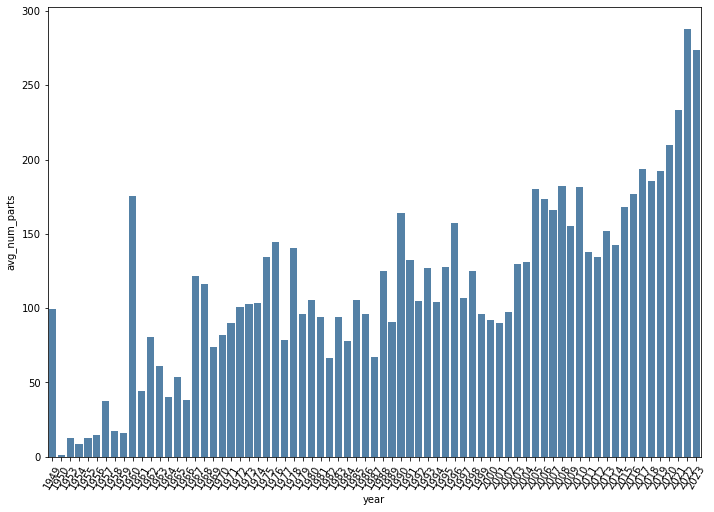

In [47]:
plt.clf()
#customized and interactive bar plot
fig, ax = plt.subplots(figsize=(11.7, 8.27))
plt.xticks(rotation=60)
sns.barplot(ax=ax, data=avg_df, x="year", y="avg_num_parts",color='steelblue')
plt.show()